<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Elvis!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

## PROJECT GOAL

The goal of this project is to analyse the clien's behavior for Megaline's two prepaid plans, Surf and Ultimate, and determine which plan generates more revenue.

To do so, I will
* Collect the Data
* Clean the data 
* Perform Exploratory Data Analysis to analyse the data
* Calculate Estimated Revenue
* formulate a null and alternative hypothesis
* Give an overall recommendation that the company can follow


## Initialization

### LOADING LIBRIARIES

The following libriaries will be used in this project:
* pandas for data manipulation
* matplotlip.pyplot and seaborn  for data visualization
* numpy for mathematical functions
* scipy for hypothesis testing


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind
import seaborn as sns
# Loading all the libraries



## Load data

Let df_calls, df_internet, df_messages, df_plans and df_users be the data frames for the megaline calls, internet, messages, plans and users respectively.

Using padas to read the given data sets gives :

In [2]:
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
# df_calls
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
# df_internet
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
# df_messages
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
# df_plans
df_users = pd.read_csv('/datasets/megaline_users.csv')
# df_users
# Load the data files into different DataFrames



## Prepare the data

For each of the data frames, I will use the info() method to  get a summary of the different dataframes to enable proper cleansing.

To fix the data, I will check for duplicates and possibly change the data type where necessary

## Plans

In [3]:
df_plans.info()
# Print the general/summary information about the plans' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
df_plans
# Print a sample of data for plans



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The plans data set has only two rows and eight columns.
This confirms the two plans,  Surf and Ultimate plans offered by the Megaline telecom operator


## Fix data

From the above, there are no missing values.

In [5]:
duplicated_plans = df_plans.duplicated().sum()
duplicated_plans

0

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Duplicate checking is the basis of data preprocessing

## Enrich data

I will asign the column  plan_name from object to  category.

In [6]:
df_plans['plan_name'] = df_plans['plan_name'].astype('category')
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   messages_included      2 non-null      int64   
 1   mb_per_month_included  2 non-null      int64   
 2   minutes_included       2 non-null      int64   
 3   usd_monthly_pay        2 non-null      int64   
 4   usd_per_gb             2 non-null      int64   
 5   usd_per_message        2 non-null      float64 
 6   usd_per_minute         2 non-null      float64 
 7   plan_name              2 non-null      category
dtypes: category(1), float64(2), int64(5)
memory usage: 366.0 bytes


## Users

In [7]:
df_users.info()
# Print the general/summary information about the users' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
df_users.head()
# Print a sample of data for users



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


500 rows and 8 columns.
The reg_date and Churn_date have a wrong data type. 
Unlike the other columns with 500 non_null values, The churn_date column has 34 non_null values.
This indicates 466 out of the 500 customers are still active


### Fix Data

I will do the following: 

change the reg_date and churn_date data type to datetime64.



In [9]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])


### Enrich Data

Create another column 

In [10]:
df_users['churned'] = df_users['churn_date'].notnull().astype(int)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   churned     500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB


## Calls

In [11]:
df_calls.info()
# Print the general/summary information about the calls' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
df_calls.head()
# Print a sample of data for calls



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


137735 row and 4 columns.

### Fix data

change the data type of call_date to datetime

In [13]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
duplicated_calls = df_calls.duplicated().sum()

duplicated_calls


0

### Enrich data

I will create another column with the duration rounded up to minutes.
I will create another columns for the month the calls were made

In [14]:
# df_calls['rounded_duration'] = df_calls['duration'].apply(lambda x: -(-x // 1))
# df_calls['month'] = df_calls['call_date'].dt.month
# df_calls.head()
df_calls['rounded_duration'] = df_calls['duration'].apply(np.ceil)
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.head()

,id,user_id,call_date,duration,rounded_duration,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

At the end of each call, the duration of the call is rounded up. The `np.ceil()` method should be used.

<div class="alert alert-info"> <b>Student сomments 1:</b> Student answer..</div>
    
I have done the above correction and it still gave the same answer.
I wish to know if there is any difference and how can it affect the results.
Thanks for the correction

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Good for you for using the np.ceil() method
    
Yeah, there should be a difference    
    

## Messages

In [15]:
df_messages.info()
# Print the general/summary information about the messages' DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
df_messages.head()
# Print a sample of data for messages



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


76051 rows and 3 columns.
message_date is an object data type instead of a datetime64.

### Fix data

change the data type of call_date to datetime

In [17]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
duplicated_messages = df_messages.duplicated().sum()

duplicated_messages 

0

### Enrich data

Creating another column for the month

In [18]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [19]:
df_internet.info()
# Print the general/summary information about the internet DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
df_internet.head()
# Print a sample of data for the internet traffic



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


104825 rows and 4 columns.
seesion_date object data type instead of datetime.
no missing values

### Fix data

change session_date data type

In [21]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
duplicated_internet  = df_internet.duplicated().sum()
duplicated_internet

0

### Enrich data

Create another column for rounded_mb_used
I will also create a column for session month.

In [22]:
# df_internet['rounded_mb_used'] = df_internet['mb_used'].apply(lambda x: -(-x // 1))
# df_internet['month'] = df_internet['session_date'].dt.month
# df_internet.head()
df_internet['rounded_mb_used'] = df_internet['mb_used'].apply(np.ceil)
df_internet['month'] = df_internet['session_date'].dt.month
df_internet.head()

,id,user_id,session_date,mb_used,rounded_mb_used,month
0,1000_13,1000,2018-12-29,89.86,90.0,12
1,1000_204,1000,2018-12-31,0.00,0.0,12
2,1000_379,1000,2018-12-28,660.40,661.0,12
3,1000_413,1000,2018-12-26,270.99,271.0,12
4,1000_442,1000,2018-12-27,880.22,881.0,12


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__


At the end of each month, megabytes are converted to gigabytes and rounded up. Can you please fix this?

<div class="alert alert-info"> <b>Student сomments 1:</b> ..</div>
    
The correction has been done using the np.ceil() as corrected in cell 14.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Correct

## Study plan conditions

The Megaline has the follwing plans:


In [23]:
def plan_info():
  """Prints information about two phone plans."""

  print("Surf")
  print("  Monthly charge: $20")
  print("  500 monthly minutes, 50 texts, and 15 GB of data")
  print("  After exceeding the package limits:")
  print("    1 minute: 3 cents")
  print("    1 text message: 3 cents")
  print("    1 GB of data: $10")
  print("\nUltimate")
  print("  Monthly charge: $70")
  print("  3000 monthly minutes, 1000 text messages, and 30 GB of data")
  print("  After exceeding the package limits:")
  print("    1 minute: 1 cent")
  print("    1 text message: 1 cent")
  print("    1 GB of data: $7")
plan_info()
# Print out the plan conditions and make sure they are clear for you



Surf
  Monthly charge: $20
  500 monthly minutes, 50 texts, and 15 GB of data
  After exceeding the package limits:
    1 minute: 3 cents
    1 text message: 3 cents
    1 GB of data: $10

Ultimate
  Monthly charge: $70
  3000 monthly minutes, 1000 text messages, and 30 GB of data
  After exceeding the package limits:
    1 minute: 1 cent
    1 text message: 1 cent
    1 GB of data: $7


## Aggregate data per user
This will help gain valuable insights into individual users behahiour , which can be used to improve the user experience.


In [24]:
calls_per_user_per_month = df_calls.groupby(['user_id','month',]).size().reset_index(name = 'calls_count')
calls_per_user_per_month
# Calculate the number of calls made by each user per month. Save the result.



,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [25]:
minutes_call_per_user_per_month = df_calls.groupby(['user_id','month',])['rounded_duration'].sum().reset_index()
minutes_call_per_user_per_month
# Calculate the amount of minutes spent by each user per month. Save the result.



,user_id,month,rounded_duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [26]:
messages_per_user_per_month = df_messages.groupby(['user_id','month']).size().reset_index(name = 'message_count')

messages_per_user_per_month
# Calculate the number of messages sent by each user per month. Save the result.



,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [27]:
monthly_internet = df_internet.groupby(['user_id','month'])['rounded_mb_used'].sum().reset_index()
monthly_internet
# Calculate the volume of internet traffic used by each user per month. Save the result.



,user_id,month,rounded_mb_used
0,1000,12,1903.0
1,1001,8,6929.0
2,1001,9,13333.0
3,1001,10,22356.0
4,1001,11,18524.0
...,...,...,...
2272,1498,12,23160.0
2273,1499,9,13004.0
2274,1499,10,19515.0
2275,1499,11,16834.0


In [28]:
merged_df = pd.merge(calls_per_user_per_month, minutes_call_per_user_per_month, on=['user_id', 'month'], how='inner')

merged_df = pd.merge(merged_df, messages_per_user_per_month, on=['user_id', 'month'], how='inner')
merged_df = pd.merge(merged_df, monthly_internet, on=['user_id', 'month'], how='inner')
merged_df = pd.merge(merged_df, df_users, on=['user_id',], how='inner')
merged_df
# Merge the data for calls, minutes, messages, internet based on user_id and month



,user_id,month,calls_count,rounded_duration,message_count,rounded_mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churned
0,1000,12,16,124.0,11,1903.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0
1,1001,8,27,182.0,30,6929.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0
2,1001,9,49,315.0,44,13333.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0
3,1001,10,65,393.0,53,22356.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0
4,1001,11,64,426.0,36,18524.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16412.0,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,0
1755,1496,10,46,317.0,18,14308.0,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,0
1756,1496,11,39,308.0,13,8561.0,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,0
1757,1496,12,40,294.0,11,16460.0,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,0


In [29]:
# surf_plan = {'monthly_charge': 20,'minutes': 500,'texts': 50,'data': 15, 'extra_minute': 0.03,'extra_text': 0.03,
#             'extra_data': 10}
# ultimate_plan = {'monthly_charge': 70,'minutes': 3000,'texts': 1000,'data': 30,'extra_minute': 0.01,'extra_text': 0.01,
#                  'extra_data': 7}
merged_df.info()
# Add the plan information



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 1758
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           1759 non-null   int64         
 1   month             1759 non-null   int64         
 2   calls_count       1759 non-null   int64         
 3   rounded_duration  1759 non-null   float64       
 4   message_count     1759 non-null   int64         
 5   rounded_mb_used   1759 non-null   float64       
 6   first_name        1759 non-null   object        
 7   last_name         1759 non-null   object        
 8   age               1759 non-null   int64         
 9   city              1759 non-null   object        
 10  reg_date          1759 non-null   datetime64[ns]
 11  plan              1759 non-null   object        
 12  churn_date        118 non-null    datetime64[ns]
 13  churned           1759 non-null   int64         
dtypes: datetime64[ns](2), fl

In [30]:
# def calculate_revenue(row, plan):
#     """
#     Calculates monthly revenue for a user based on their usage and the plan.

#     Args:
#         row: A pandas Series representing a single user's data.
#         plan: A dictionary containing plan details.

#     Returns:
#         The calculated monthly revenue.
#     """
#     base_charge = plan['monthly_charge']
#     extra_minutes = max(0, row['calls_count'] - plan['minutes'])
#     extra_texts = max(0, row['message_count'] - plan['texts'])
#     extra_data = max(0, row['rounded_mb_used'] - plan['data'])

#     extra_cost = (extra_minutes * plan['extra_minute'] + extra_texts * plan['extra_text'] +
#                     extra_data * plan['extra_data'])

#     return base_charge + extra_cost
# # merged_df['plan'] = merged_df['rounded_mb_used'].apply(lambda x: 'surf' if x < 3000 else 'ultimate')
# merged_df['revenue'] = merged_df.apply(lambda row: calculate_revenue(row, surf_plan) if row['plan'] == 'surf' 
#                                 else calculate_revenue(row, ultimate_plan), axis=1)
# merged_df
# # Calculate the monthly revenue for each user

def calculate_revenue(row):
    """
    Calculates revenue for a given row in the DataFrame.

    Args:
        row: A single row from the merged_df DataFrame.

    Returns:
        The total revenue for the user in that month.
    """

    plan = row['plan']
    calls_count = row['calls_count']
    message_count = row['message_count']
    rounded_mb_used = row['rounded_mb_used'] 

    if plan == 'surf':
        monthly_charge = 20
        minute_overage_cost = 0.03
        message_overage_cost = 0.03
        data_overage_cost = 10
        minute_limit = 500
        message_limit = 50
        data_limit = 15 * 1024  # Convert GB to MB

    elif plan == 'ultimate':
        monthly_charge = 70
        minute_overage_cost = 0.01
        message_overage_cost = 0.01
        data_overage_cost = 7
        minute_limit = 3000
        message_limit = 1000
        data_limit = 30 * 1024  # Convert GB to MB

    else:
        raise ValueError(f"Invalid plan: {plan}. Valid plans are: surf, ultimate") 

    # Calculate overage usage
    overage_minutes = max(0, calls_count - minute_limit)
    overage_messages = max(0, message_count - message_limit)
    overage_data = max(0, rounded_mb_used - data_limit)

    # Calculate total overage costs
    overage_cost = (overage_minutes * minute_overage_cost) + \
                   (overage_messages * message_overage_cost) + \
                   (overage_data / 1024) * data_overage_cost

    # Calculate total revenue
    total_revenue = monthly_charge + overage_cost

    return total_revenue

# Assuming 'merged_df' is your DataFrame
merged_df['calculated_revenue'] = merged_df.apply(calculate_revenue, axis=1)

merged_df.head()

,user_id,month,calls_count,rounded_duration,message_count,rounded_mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churned,calculated_revenue
0,1000,12,16,124.0,11,1903.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0,70.000000
1,1001,8,27,182.0,30,6929.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,20.000000
2,1001,9,49,315.0,44,13333.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,20.000000
3,1001,10,65,393.0,53,22356.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,88.410313
4,1001,11,64,426.0,36,18524.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,50.898438


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__


revenue 223430.09$ in month for telephone?

<div class="alert alert-info"> <b>Student сomments 1:</b> ..</div>
    
The revenue was really too high for telephone per month.
I have corrected the mistake in my calculations

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Great. Code

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

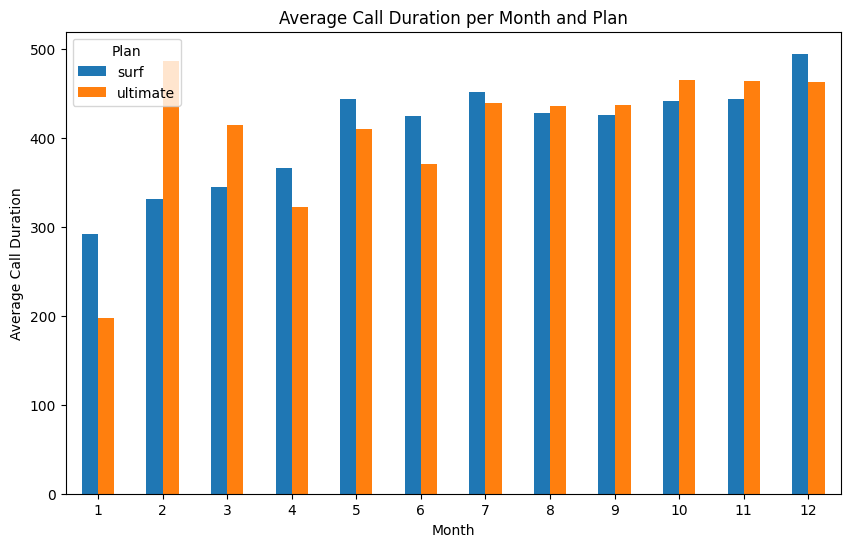

In [31]:
avg_duration_by_month_plan = merged_df.groupby(['month', 'plan'])['rounded_duration'].mean().reset_index()
pivot_table1 = avg_duration_by_month_plan.pivot(index='month', columns='plan', values='rounded_duration')
pivot_table1.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Average Call Duration per Month and Plan')
plt.legend(title='Plan')
plt.xticks(rotation=0)
plt.show()
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.



The average call durration for both plans almost follow the same patterns accross acrros the months of the year.
The ultimate plans records the highest duration in the month of February while the surf plan does in the month of December.
The surf plan dominates in many months over the ultimate plan .

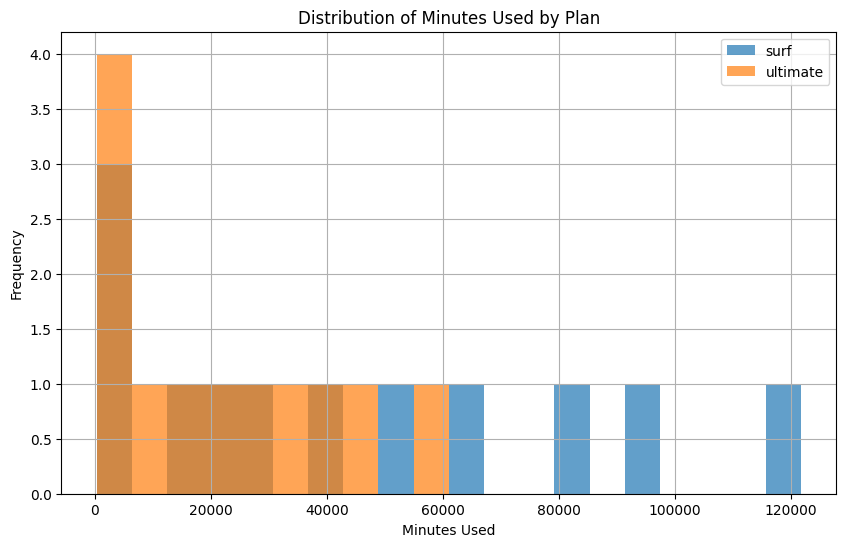

In [32]:
grouped_df2 = merged_df.groupby(['plan', 'month'])['rounded_duration'].sum().reset_index()
pivot_table2 = grouped_df2.pivot(index='month', columns='plan', values='rounded_duration')
pivot_table2.plot(kind='hist', bins=20, alpha=0.7, figsize=(10, 6))
plt.xlabel('Minutes Used')
plt.ylabel('Frequency')
plt.title('Distribution of Minutes Used by Plan')
plt.legend()
plt.grid(True)
plt.show()
# Compare the number of minutes users of each plan require each month. Plot a histogram.



From the above, most of the calls made by users of boths plans lasted for less than 70000 minutes, with the ultimate plan having the highest frequency.

In [33]:
mean_duration = round(merged_df['rounded_duration'].mean(),3)
variance_duration = round(merged_df['rounded_duration'].var(),3)

"The Mean and Variance of Monthly Call Duration are :" , mean_duration, variance_duration

# Calculate the mean and the variance of the monthly call duration



('The Mean and Variance of Monthly Call Duration are :', 444.702, 57582.921)

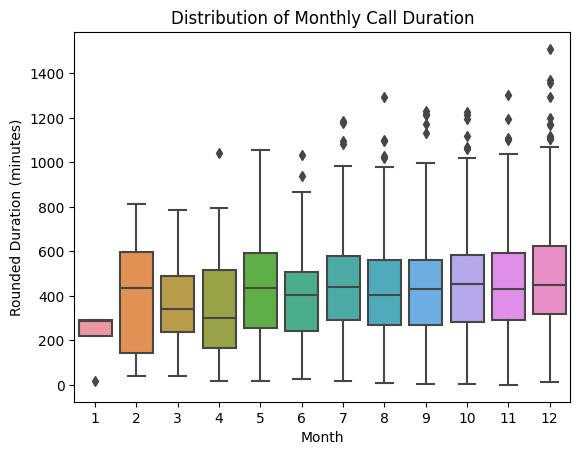

In [34]:
sns.boxplot(x='month', y='rounded_duration', data=merged_df)
plt.title('Distribution of Monthly Call Duration')
plt.xlabel('Month')
plt.ylabel('Rounded Duration (minutes)')
plt.show()
# Plot a boxplot to visualize the distribution of the monthly call duration



From the boxplot above,
* January registered the least number of calls and a call that lasted for very few munutes.
* Febraury and December are the months with the highest number of calls. 
* The highest call duration was made in the month of May


### Messages

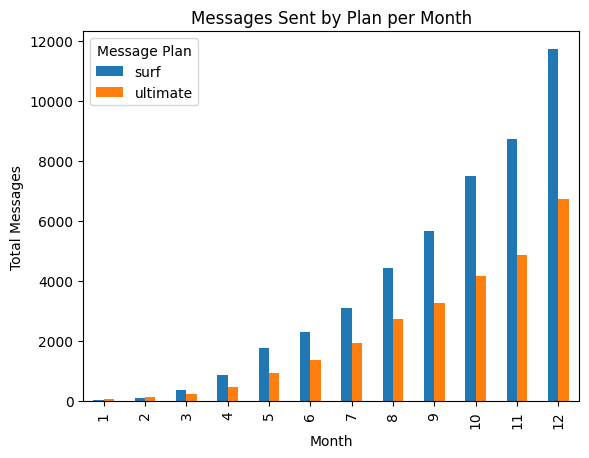

In [35]:
grouped_df3 = merged_df.groupby(['plan', 'month'])['message_count'].sum().reset_index()
pivot_table3 = grouped_df3.pivot(index='month', columns='plan', values='message_count')
pivot_table3.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Messages')
plt.title('Messages Sent by Plan per Month')
plt.legend(title='Message Plan')
plt.show()
# Compare the number of messages users of each plan tend to send each month



In [36]:
avg_traffic_per_plan = merged_df.groupby('plan')['rounded_mb_used'].mean()
avg_traffic_per_plan
# Compare the amount of internet traffic consumed by users per plan



plan
surf        16648.568644
ultimate    17270.944732
Name: rounded_mb_used, dtype: float64

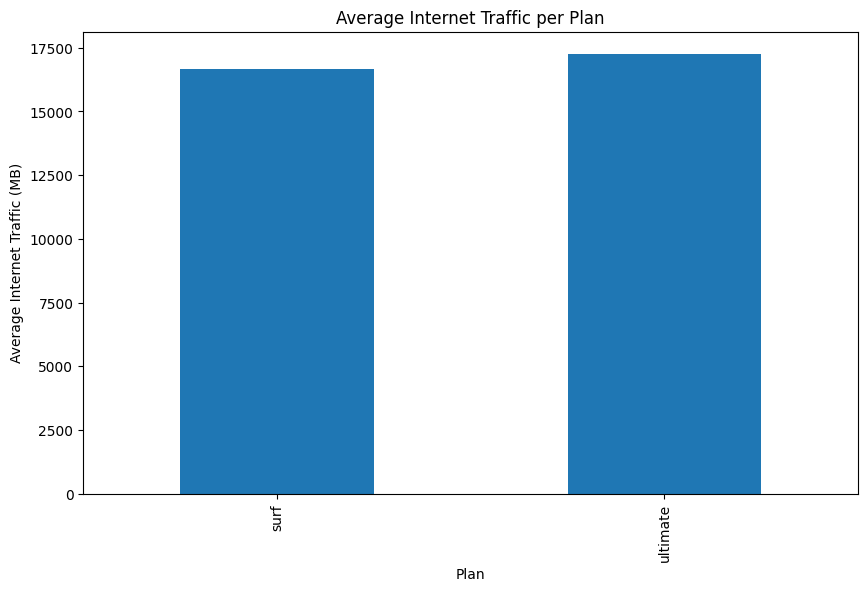

In [37]:
plt.figure(figsize=(10, 6))
avg_traffic_per_plan.plot(kind='bar')
plt.xlabel('Plan')
plt.ylabel('Average Internet Traffic (MB)')
plt.title('Average Internet Traffic per Plan')
plt.show()

Both plans almost have the same internet traffic plans to benefit the company though the ultimate plan is slightly above. 

### Internet

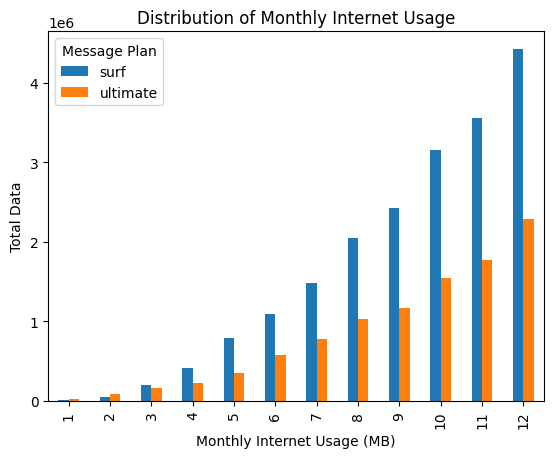

In [38]:
monthly_internet_usage = merged_df.groupby(['plan', 'month'])['rounded_mb_used'].sum().reset_index()
pivot_table4 = monthly_internet_usage.pivot(index='month', columns='plan', values='rounded_mb_used')
pivot_table4.plot(kind='bar')
plt.xlabel('Monthly Internet Usage (MB)')
plt.ylabel('Total Data')
plt.title('Distribution of Monthly Internet Usage')
plt.legend(title='Message Plan')
plt.show()



The plot shows that consumme intrnet using the surf plan more than the ultimate plan.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

It is better after each section, graph (or series of tests) to write a conclusion on the obtained data taking into account the set business task - so it is easier to read the project, because future colleagues or customers will not have to interpret the results of each section, test or graph themselves.
    
---
    
In markdown 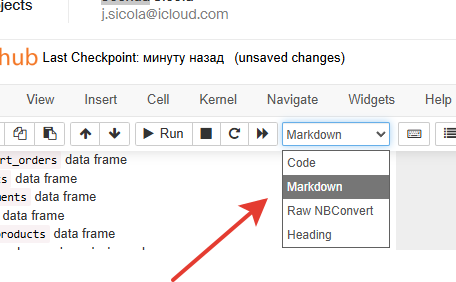

<div class="alert alert-info"> <b>Student сomments 1:</b> ..</div>
    
Thanks for the remark Sir.
I have corrected them.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Well done

## Revenue

In [39]:
# Print the summary statistics
revenue_stats = merged_df.groupby('plan')['calculated_revenue']
revenue_stats.describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1180.0,55.394314,51.012821,20.0,20.0,35.477227,75.244512,565.522187
ultimate,579.0,72.076082,10.528180,70.0,70.0,70.000000,70.000000,178.787109


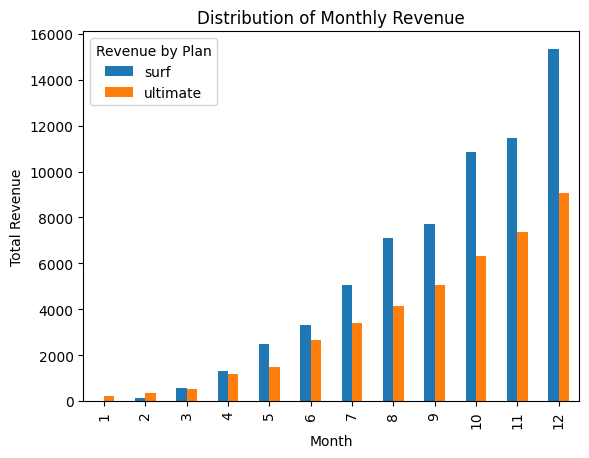

In [40]:
monthly_revenue = merged_df.groupby(['plan', 'month'])['calculated_revenue'].sum().reset_index()
pivot_table5 = monthly_revenue.pivot(index='month', columns='plan', values='calculated_revenue')
pivot_table5.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Distribution of Monthly Revenue')
plt.legend(title='Revenue by Plan')
plt.show()


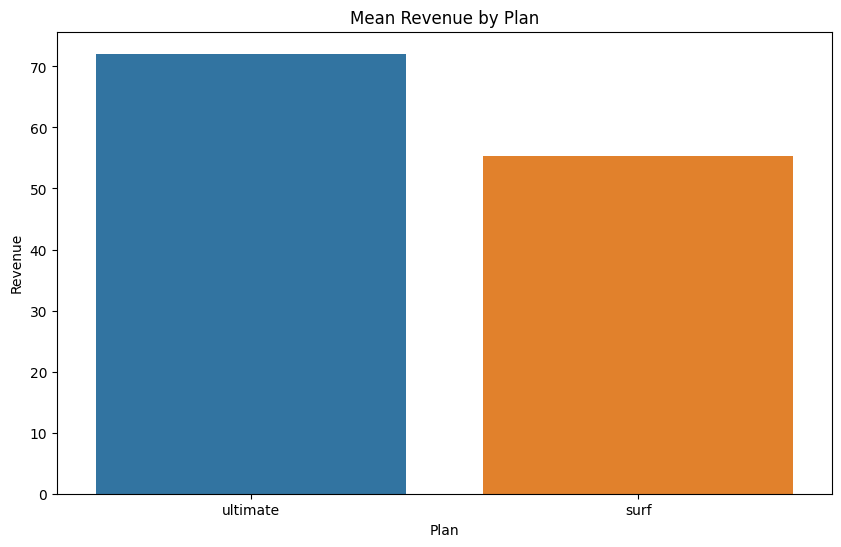

In [41]:
# Create a bar plot of mean revenue for each plan
plt.figure(figsize=(10, 6))
sns.barplot(x='plan', y='calculated_revenue', data=merged_df, ci=None)
plt.title('Mean Revenue by Plan')
plt.xlabel('Plan')
plt.ylabel('Revenue')
plt.show()

The ultimate plan makes more revenue than the surf plan

## Test statistical hypotheses

Let the null hypothesis(Ho) be "The average revenue from users of the Ultimate and Surf calling plans is equal."

Alternative Hypothesis (H1):The average revenue from users of the Ultimate and Surf calling plans are not equal.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct interpretation of the null and alternative hypotheses

In [42]:
ultimate_users = merged_df[merged_df['plan'] == 'ultimate']
surf_users = merged_df[merged_df['plan'] == 'surf']
# Null Hypothesis (H0): 
# The average revenue from users of the Ultimate and Surf calling plans is equal.
# Alternative Hypothesis (H1): 
# The average revenue from users of the Ultimate and Surf calling plans are not equal.
alpha = 0.05
t_stat, p_value = ttest_ind(ultimate_users['calculated_revenue'], surf_users['calculated_revenue'])
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")
# Test the hypotheses



1.1667834288194866e-14
Reject the null hypothesis.


In [43]:
surf_users.head(2)

,user_id,month,calls_count,rounded_duration,message_count,rounded_mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churned,calculated_revenue
1,1001,8,27,182.0,30,6929.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,20.0
2,1001,9,49,315.0,44,13333.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,20.0


In [44]:
ultimate_users.head(2)

,user_id,month,calls_count,rounded_duration,message_count,rounded_mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churned,calculated_revenue
0,1000,12,16,124.0,11,1903.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0,70.0
19,1006,11,2,10.0,15,2072.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1,70.0


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

Result nan - incorrect data in the hypothesis 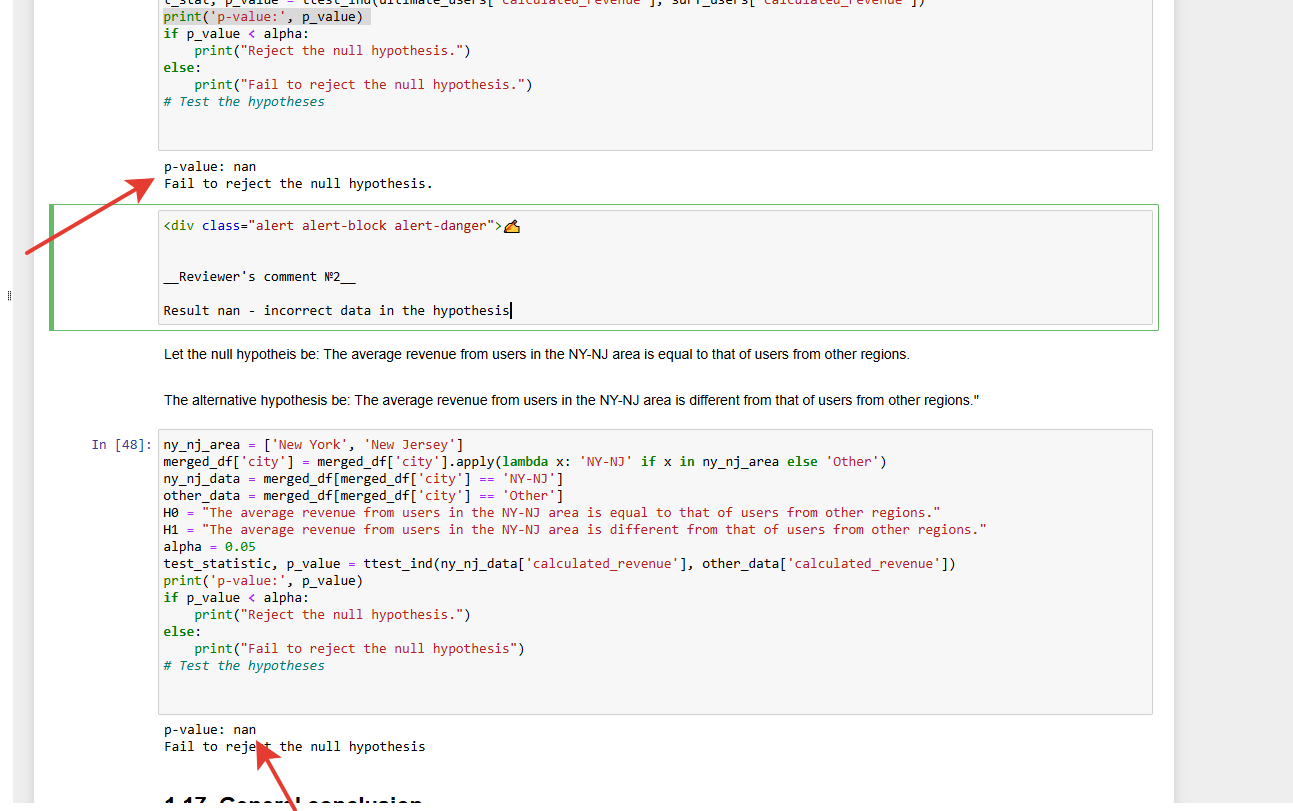

<div class="alert alert-info"> <b>Student сomments 2:</b> ..</div>
    
Thanks for the remark Sir.
I have done the correction.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №3__

Unfortunately, the result is not. There is no information in the variables 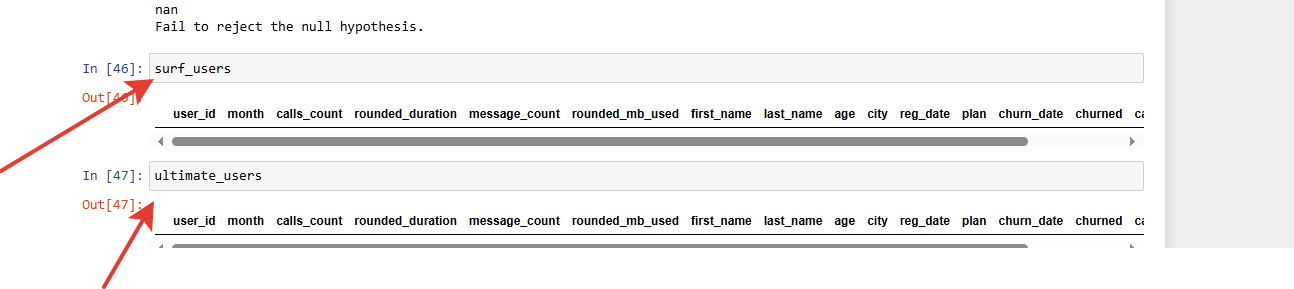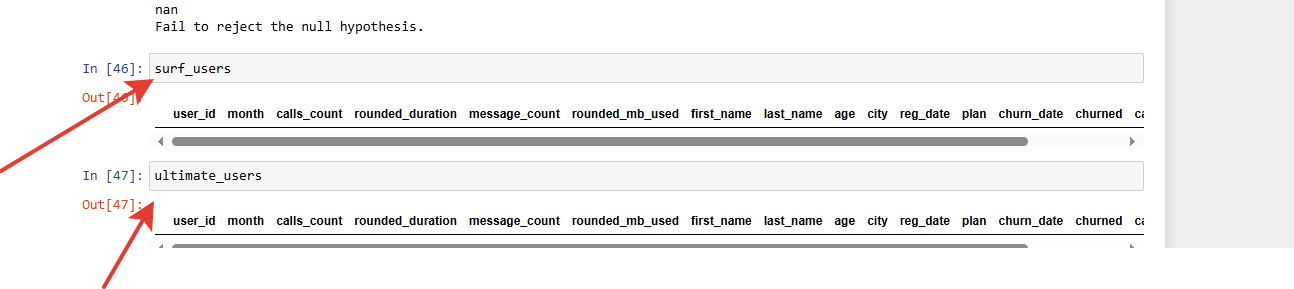

<div class="alert alert-info"> <b>Student сomments 3:</b> ..</div>
    
There was an error at the level of Ultimate_users and Surf_users, the first letters were suppose to be in small letters.

Let the null hypotheis be: The average revenue from users in the NY-NJ area is equal to that of users from other regions.

The alternative hypothesis be: The average revenue from users in the NY-NJ area is different from that of users from other regions."

In [45]:
# ny_nj_area = ['New York', 'New Jersey']
# merged_df['city'] = merged_df['city'].apply(lambda x: 'NY-NJ' if x in ny_nj_area else 'Other')
ny_nj_data = merged_df[merged_df['city'].str.contains('NY-NJ')]
other_data = merged_df[~merged_df['city'].str.contains('NY-NJ')]
H0 = "The average revenue from users in the NY-NJ area is equal to that of users from other regions."
H1 = "The average revenue from users in the NY-NJ area is different from that of users from other regions."
alpha = 0.05
test_statistic, p_value = ttest_ind(ny_nj_data['calculated_revenue'], other_data['calculated_revenue'])
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis")
# Test the hypotheses



0.0048649286106909415
Reject the null hypothesis.


<div class="alert alert-info"> <b>Student сomments 3:</b> ..</div>
    
I failed to filter the users in the NY and NJ area.

In [46]:
ny_nj_data = merged_df[merged_df['city'].str.contains('NY-NJ')]
ny_nj_data.head(2)

,user_id,month,calls_count,rounded_duration,message_count,rounded_mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churned,calculated_revenue
37,1014,11,28,163.0,9,1176.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaT,0,20.00
38,1014,12,150,1114.0,64,7803.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaT,0,20.42


In [47]:
other_data = merged_df[~merged_df['city'].str.contains('NY-NJ')]
other_data.head(2)

,user_id,month,calls_count,rounded_duration,message_count,rounded_mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churned,calculated_revenue
0,1000,12,16,124.0,11,1903.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0,70.0
1,1001,8,27,182.0,30,6929.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0,20.0


## General conclusion

Based on the results of the t-test, we  reject the null hypothesis. This means that there is sufficient evidence to conclude that the average revenue from users of the Ultimate and Surf calling plans are statistically different.


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__


We need to describe in text the result of the work (main results. What was conducted in the exploratory analysis, etc.)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊